## Understanding Missing Data using [missingno](https://github.com/ResidentMario/missingno)
Messy datasets? Missing values? missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.

In [2]:
# load libraries
%matplotlib inline
import pandas as pd
import missingno as msno
import geopandas as gpd

In [5]:
df = pd.read_csv('../module03/data/LEX_address_points.csv')

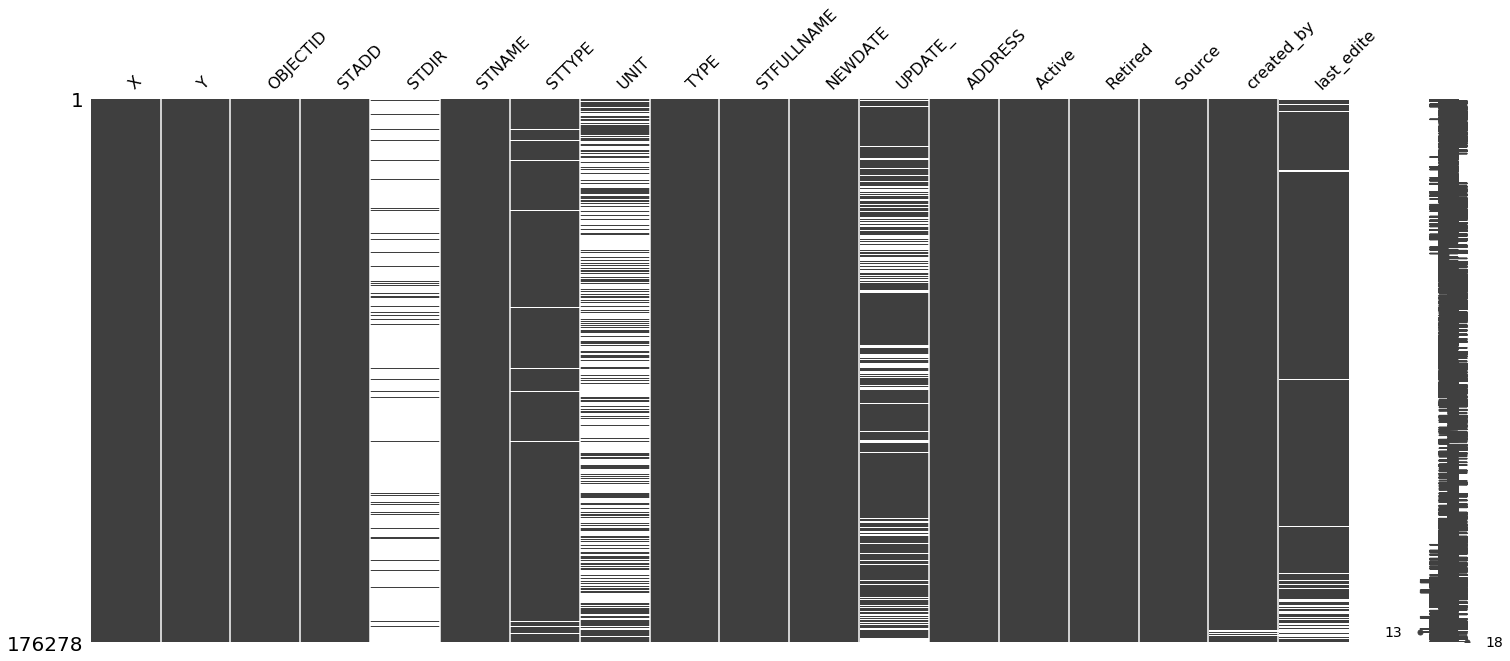

In [24]:
msno.matrix(df);

At a glance, the geographic information (X & Y columns), street address, street name, type, street full name, newdate, address, active, retired, source appear to be completely populated. 

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows. Sampling smaller portions of the dataset will show a more informative sparkline.

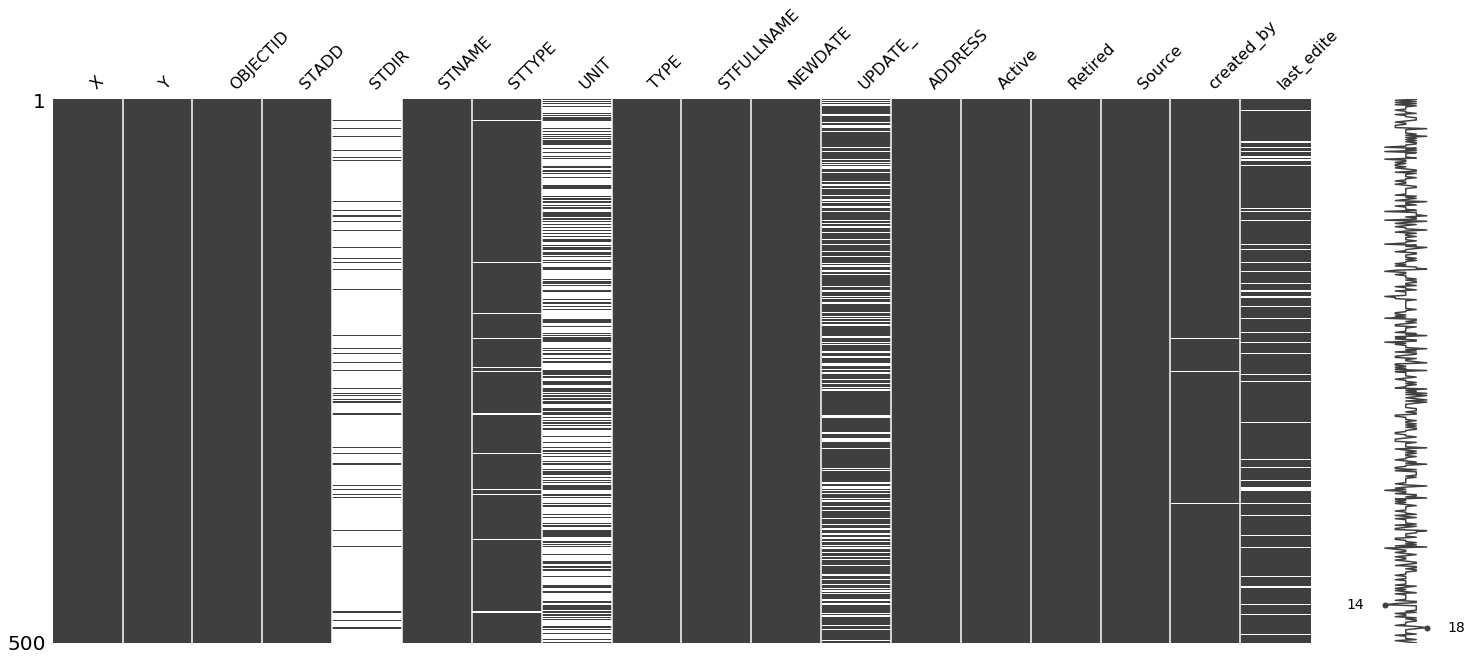

In [35]:
msno.matrix(df.sample(500));

***I have not figured out how to make this following part work for this dataset***
If you are working with time-series data, you can specify a periodicity using the freq keyword parameter:

> null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)  
> null_pattern = pd.DataFrame(null_pattern).replace({False: None})  
> msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

## Bar Chart
msno.bar is a simple visualization of nullity by column:

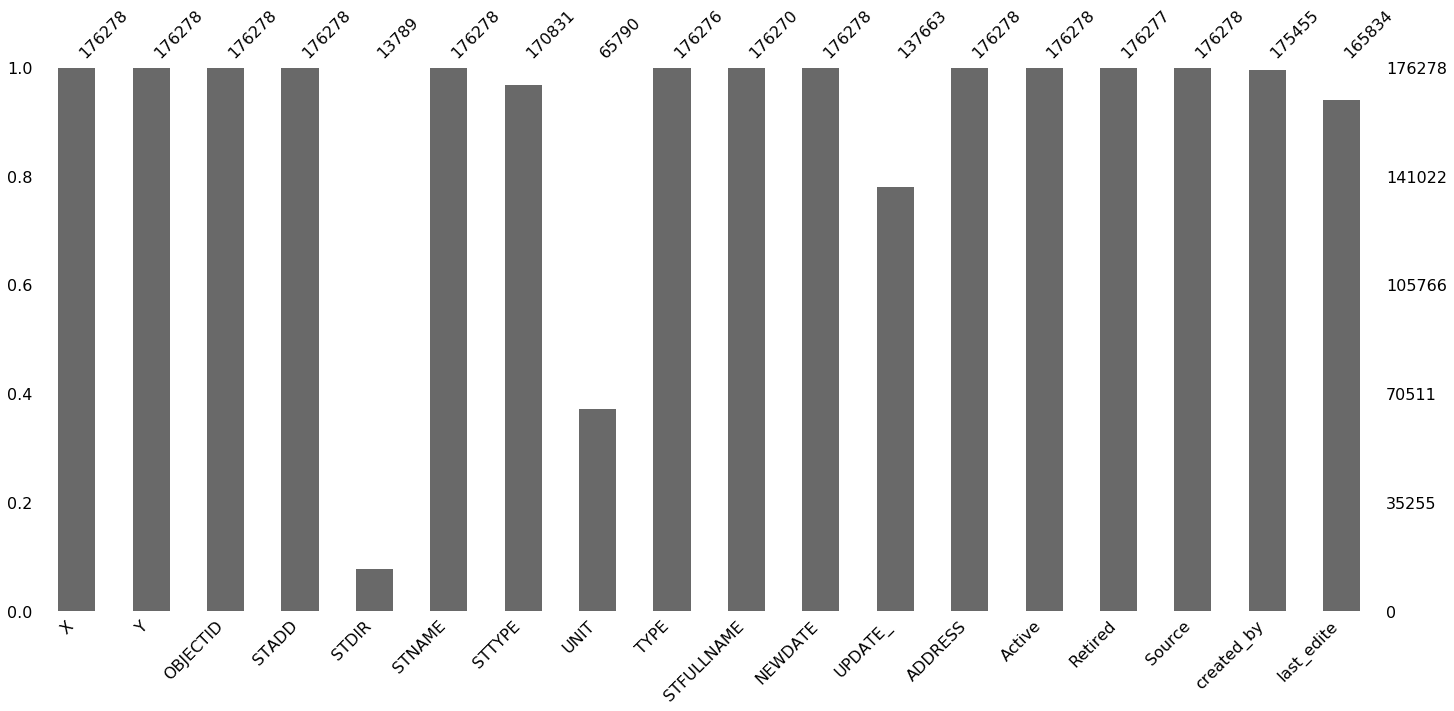

In [45]:
msno.bar(df)

You can switch to a logarithmic scale by specifying log=True. bar provides the same information as matrix, but in a simpler format.

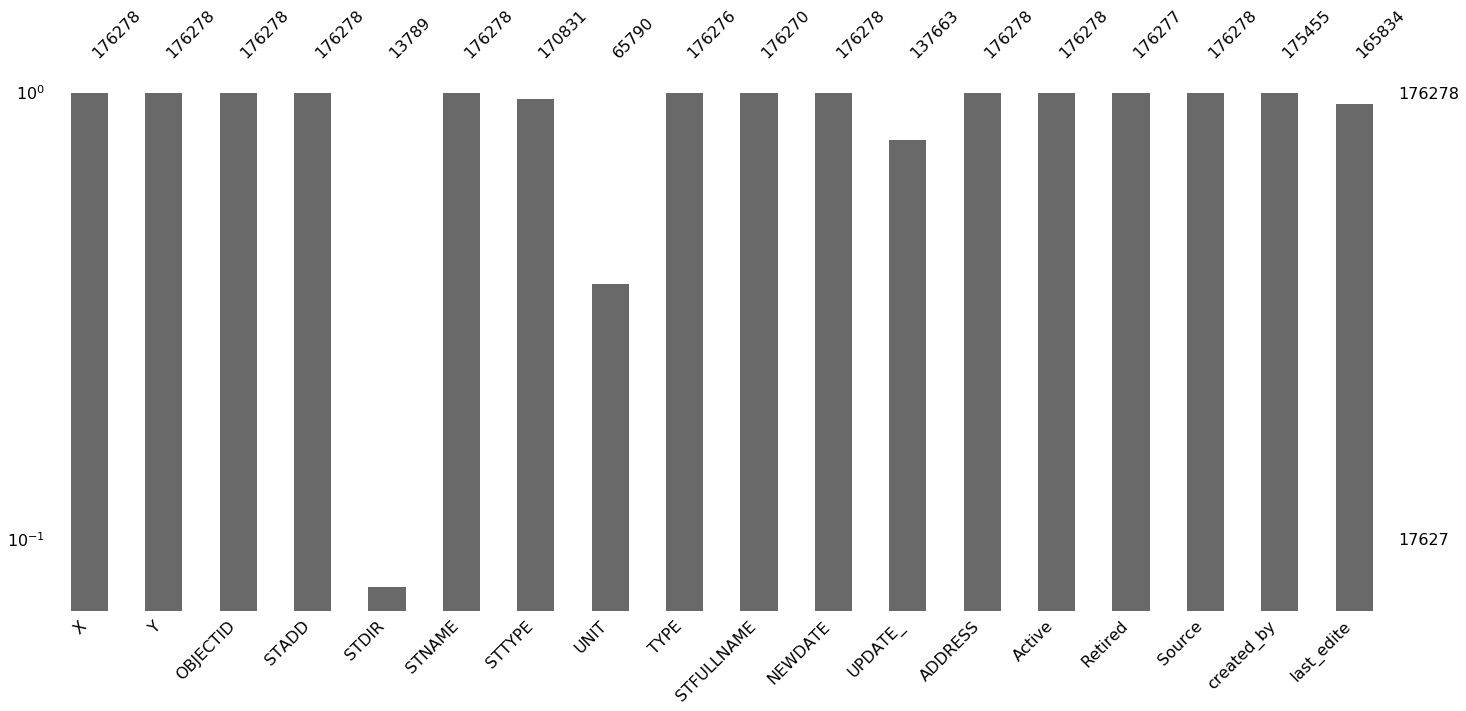

In [44]:
msno.bar(df, log=True)

## Heatmap
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

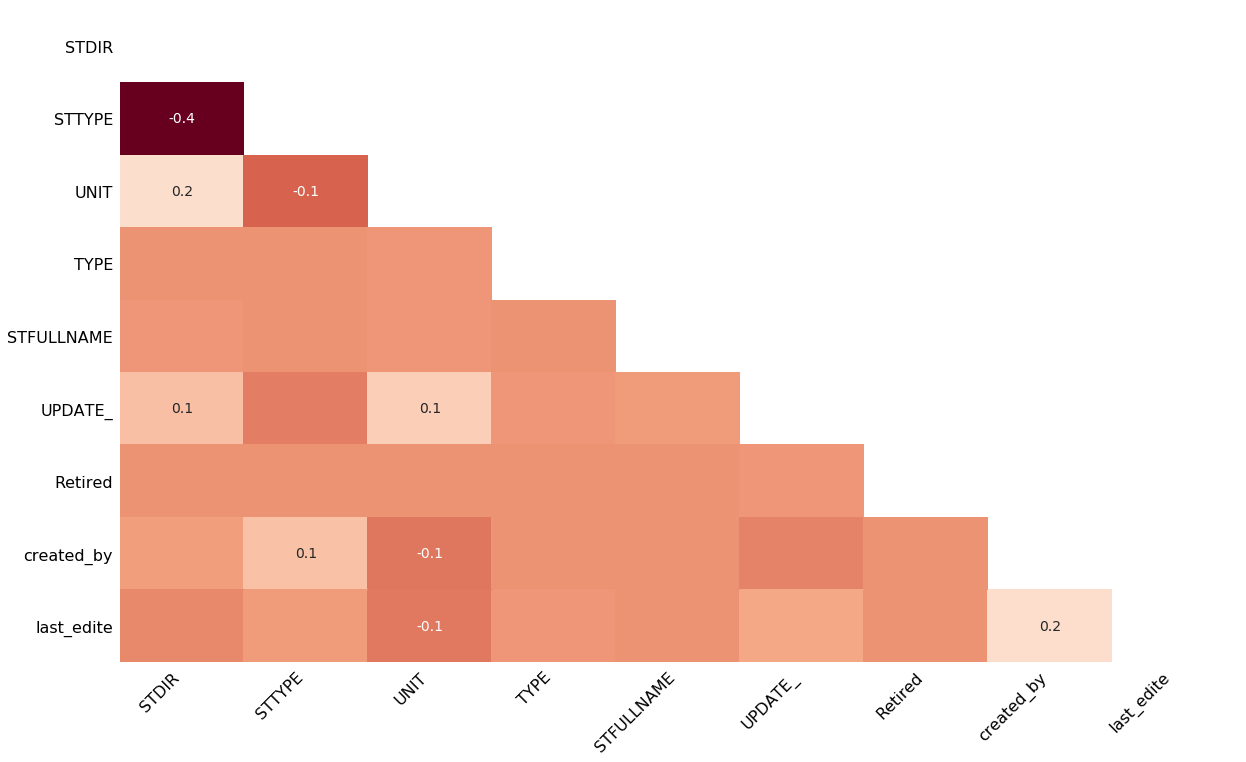

In [46]:
msno.heatmap(df)

## Dendrogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

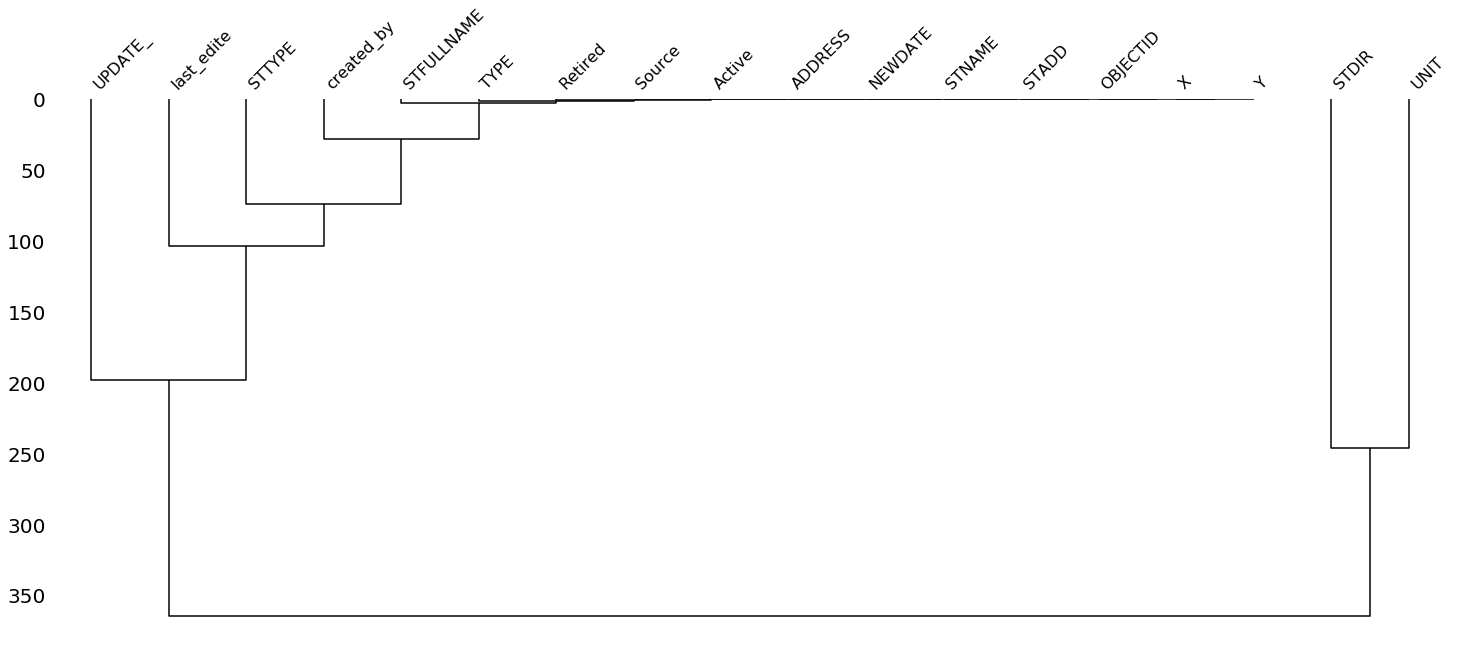

In [48]:
msno.dendrogram(df);

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

## Geoplot
One kind of pattern that's particularly difficult to check, where it appears, is geographic distribution. missingno supports visualizing geospatial data nullity patterns with a geoplot visualization. This is an experimental data visualization type, and requires the geoplot and geopandas libraries. These are optional dependencies are must be installed separately from the rest of missingno. Once you have them you can run:

In [50]:
msno.geoplot(df, x='LONGITUDE', y='LATITUDE')

ModuleNotFoundError: No module named 'geoplot'